In [3]:
import pandas as pd

In [4]:
pd.read_csv(r"C:\Users\ELIAS\Desktop\Oasis infobyte\Dataset\customer_shopping_data.csv")

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Unnamed: 10
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05/08/2022,Kanyon,NaN
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,NaN
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09/11/2021,Metrocity,NaN
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,NaN
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,NaN
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,NaN
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,NaN
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,NaN


In [5]:
df_1=pd.read_csv(r"C:\Users\ELIAS\Desktop\Oasis infobyte\Dataset\customer_shopping_data.csv")

In [6]:
df_1.describe()

,age,quantity,price,Unnamed: 10
count,99457.000000,99457.000000,99457.000000,0.0
mean,43.427089,3.003429,689.256321,NaN
std,14.990054,1.413025,941.184567,NaN
min,18.000000,1.000000,5.230000,NaN
25%,30.000000,2.000000,45.450000,NaN
50%,43.000000,3.000000,203.300000,NaN
75%,56.000000,4.000000,1200.320000,NaN
max,69.000000,5.000000,5250.000000,NaN


In [7]:
df_1.drop(columns=["Unnamed: 10"], inplace=True)

In [8]:
df_1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05/08/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [12]:
#exploratory data Analysis

In [9]:
df_1["payment_method"].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

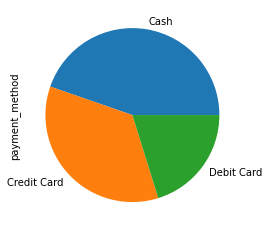

In [10]:
#Variations across payment methods
df_1["payment_method"].value_counts().plot( kind= 'pie')

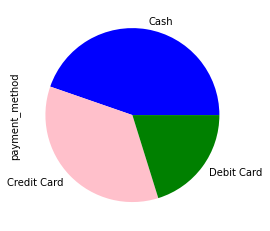

In [11]:
#assign colors to the pie chart
colors= ['blue', 'pink', 'green']
df_1["payment_method"].value_counts().plot( kind= 'pie', colors=colors)

In [12]:
df_1.groupby(["category", "quantity"]).size()

category         quantity
Books            1            985
                 2           1008
                 3           1000
                 4            959
                 5           1029
Clothing         1           6841
                 2           6950
                 3           6907
                 4           6849
                 5           6940
Cosmetics        1           2986
                 2           2974
                 3           3072
                 4           3010
                 5           3055
Food & Beverage  1           3002
                 2           2909
                 3           2992
                 4           2884
                 5           2989
Shoes            1           1944
                 2           2045
                 3           2010
                 4           2022
                 5           2013
Souvenir         1           1024
                 2            984
                 3           1077
                 4    

In [13]:
df_1["category"].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

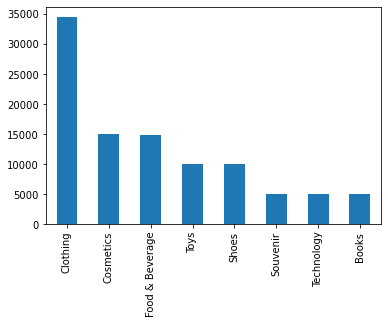

In [14]:
ax=df_1["category"].value_counts().plot(kind='bar')

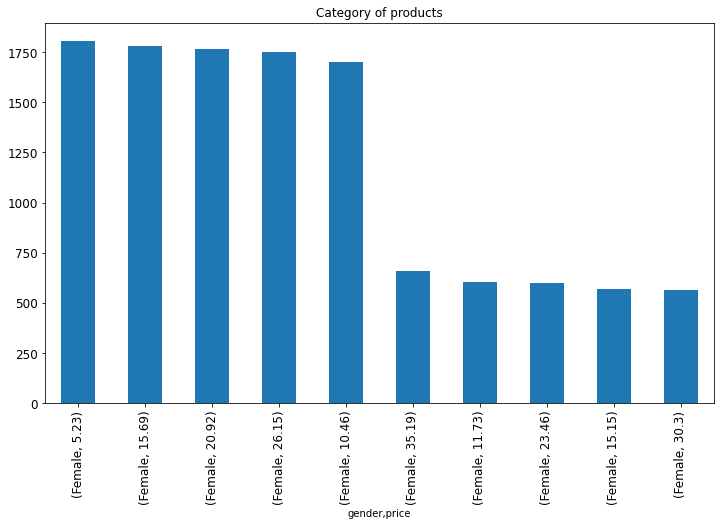

In [33]:
#Rename the graph and axes
df_1.groupby(["gender", "price"]).size().head(10).sort_values(ascending= False).plot(kind='bar', title= 'Category of products', figsize=(12,7), fontsize=12)

In [16]:
df_1["invoice_date"]=pd.to_datetime(df_1["invoice_date"])

In [18]:
#category groupby with a dataframe(category)
category=df_1.groupby(["category"]).size()

In [44]:
category

category         quantity
Books            1            985
                 2           1008
                 3           1000
                 4            959
                 5           1029
Clothing         1           6841
                 2           6950
                 3           6907
                 4           6849
                 5           6940
Cosmetics        1           2986
                 2           2974
                 3           3072
                 4           3010
                 5           3055
Food & Beverage  1           3002
                 2           2909
                 3           2992
                 4           2884
                 5           2989
Shoes            1           1944
                 2           2045
                 3           2010
                 4           2022
                 5           2013
Souvenir         1           1024
                 2            984
                 3           1077
                 4    

In [19]:
#Classify age in three main group (Teennager<19, young adult (20-40), old adult>40)
def classify_age(age):
    if age<20:
        return 'Teenager'
    elif 20<= age < 40:
        return 'Young Adult'
    else:
        return 'Old Adult'

In [20]:
df_1['age'].apply(classify_age)

0        Young Adult
1        Young Adult
2        Young Adult
3          Old Adult
4          Old Adult
            ...     
99452      Old Adult
99453    Young Adult
99454      Old Adult
99455      Old Adult
99456    Young Adult
Name: age, Length: 99457, dtype: object

In [21]:
df_1['age_group']=df_1['age'].apply(classify_age)

In [22]:
df_1. tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,Old Adult
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,Young Adult
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,Old Adult
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,Old Adult
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,2022-10-15,Mall of Istanbul,Young Adult


In [23]:
df_1.groupby("age_group").count()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
age_group,,,,,,,,,,
Old Adult,57127,57127,57127,57127,57127,57127,57127,57127,57127,57127
Teenager,3780,3780,3780,3780,3780,3780,3780,3780,3780,3780
Young Adult,38550,38550,38550,38550,38550,38550,38550,38550,38550,38550


In [24]:
df_1["age_group"].value_counts()

Old Adult      57127
Young Adult    38550
Teenager        3780
Name: age_group, dtype: int64

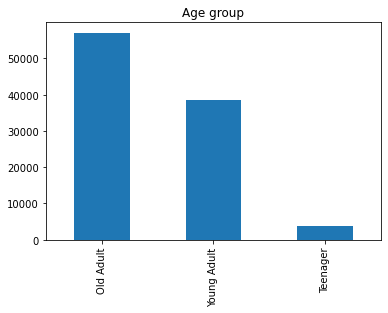

In [25]:
#the graph for age groups variation
df_1["age_group"].value_counts().plot(kind='bar', title= 'Age group')

In [26]:
df_1.groupby(["age_group", "category", "gender"]).max()

invoice_no customer_id  age  quantity  \
age_group   category        gender                                         
Old Adult   Books           Female    I998246     C998754   69         5   
                            Male      I999769     C999910   69         5   
            Clothing        Female    I999959     C999995   69         5   
                            Male      I999670     C999631   69         5   
            Cosmetics       Female    I998731     C999810   69         5   
                            Male      I998895     C999032   69         5   
            Food & Beverage Female    I999450     C999363   69         5   
                            Male      I999952     C999886   69         5   
            Shoes           Female    I999868     C999024   69         5   
                            Male      I999311     C999685   69         5   
            Souvenir        Female    I999572     C999683   69         5   
                            Male      I998572     C998880   69         5   
            Technology      Female    I998489     C998781   69         5   
                            Male      I999972     C994118   69         5   
            Toys            Female    I998643     C999976   69         5   
                            Male      I999956     C999586   69         5   
Teenager    Books           Female    I983693     C953323   19         5   
                            Male      I986693     C927132   19         5   
            Clothing        Female    I998874     C984007   19         5   
                            Male      I997951     C997246   19         5   
            Cosmetics       Female    I981852     C990494   19         5   
                            Male      I978250     C986546   19         5   
            Food & Beverage Female    I998421     C997699   19         5   
                            Male      I975873     C987617   19         5   
            Shoes           Female    I984801     C992548   19         5   
                            Male      I907811     C976996   19         5   
            Souvenir        Female    I966240     C940873   19         5   
                            Male      I965374     C973727   19         5   
            Technology      Female    I989853     C974102   19         5   
                            Male      I950920     C995927   19         5   
            Toys            Female    I984329     C960234   19         5   
                            Male      I991507     C970421   19         5   
Young Adult Books           Female    I995692     C998912   39         5   
                            Male      I997944     C991218   39         5   
            Clothing        Female    I998227     C999974   39         5   
                            Male      I999779     C999361   39         5   
            Cosmetics       Female    I999344     C999653   39         5   
                            Male      I998713     C999770   39         5   
            Food & Beverage Female    I999692     C999000   39         5   
                            Male      I999948     C999854   39         5   
            Shoes           Female    I999922     C999457   39         5   
                            Male      I995836     C998904   39         5   
            Souvenir        Female    I999106     C996616   39         5   
                            Male      I999852     C994685   39         5   
            Technology      Female    I999994     C999272   39         5   
                            Male      I999973     C997851   39         5   
            Toys            Female    I998780     C998274   39         5   
                            Male      I996565     C997799   39         5   

                                      price payment_method invoice_date  \
age_group   category        gender                                        
Old Adult   Books           Female    75.75     Debit Card   31/12/2022   
         

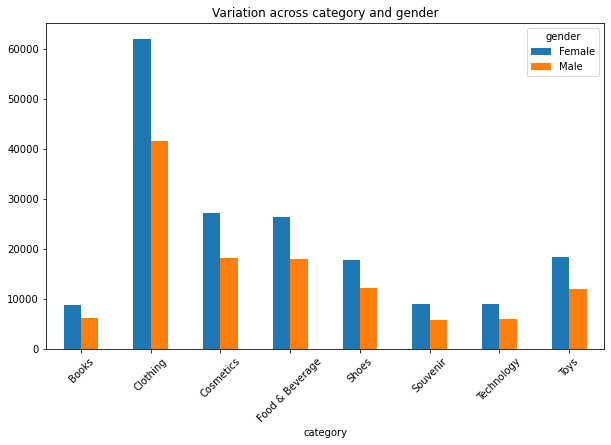

In [34]:
grouped= df_1.groupby(["category", "gender"])["quantity"].sum().unstack()
grouped.plot(kind='bar', figsize=(10,6))
#Changing the graph layout and size
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.title('Variation across category and gender')
plt.tight_layout
plt.show()

In [33]:
df_1.groupby(["age_group", "category", "gender"]).min()

invoice_no customer_id  age  quantity  \
age_group   category        gender                                         
Old Adult   Books           Female    I100024     C100154   40         1   
                            Male      I100078     C100078   40         1   
            Clothing        Female    I100037     C100041   40         1   
                            Male      I100008     C100004   40         1   
            Cosmetics       Female    I100041     C100090   40         1   
                            Male      I100014     C100115   40         1   
            Food & Beverage Female    I100097     C100124   40         1   
                            Male      I100033     C100045   40         1   
            Shoes           Female    I100084     C100067   40         1   
                            Male      I100148     C100138   40         1   
            Souvenir        Female    I100059     C100367   40         1   
                            Male      I100201     C100121   40         1   
            Technology      Female    I100231     C100607   40         1   
                            Male      I100072     C100168   40         1   
            Toys            Female    I100068     C100066   40         1   
                            Male      I100080     C100006   40         1   
Teenager    Books           Female    I100760     C100301   18         1   
                            Male      I101320     C101035   18         1   
            Clothing        Female    I100028     C100654   18         1   
                            Male      I100291     C100102   18         1   
            Cosmetics       Female    I101445     C100794   18         1   
                            Male      I103070     C102693   18         1   
            Food & Beverage Female    I101229     C100529   18         1   
                            Male      I100031     C104092   18         1   
            Shoes           Female    I103120     C100661   18         1   
                            Male      I101308     C101004   18         1   
            Souvenir        Female    I101621     C101386   18         1   
                            Male      I103958     C109478   18         1   
            Technology      Female    I100027     C103781   18         1   
                            Male      I111453     C107582   18         1   
            Toys            Female    I100458     C100921   18         1   
                            Male      I100567     C101422   18         1   
Young Adult Books           Female    I100199     C100028   20         1   
                            Male      I100618     C101347   20         1   
            Clothing        Female    I100015     C100110   20         1   
                            Male      I100126     C100218   20         1   
            Cosmetics       Female    I100053     C100042   20         1   
                            Male      I100216     C100241   20         1   
            Food & Beverage Female    I100155     C100088   20         1   
                            Male      I100105     C100012   20         1   
            Shoes           Female    I100090     C100221   20         1   
                            Male      I100049     C100005   20         1   
            Souvenir        Female    I100251     C100539   20         1   
                            Male      I100542     C100182   20         1   
            Technology      Female    I101239     C100184   20         1   
                            Male      I100354     C100139   20         1   
            Toys            Female    I100408     C100019   20         1   
                            Male      I100200     C100622   20         1   

                                      price payment_method invoice_date  \
age_group   category        gender                                        
Old Adult   Books           Female    15.15           Cash   01/01/2021   
         

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

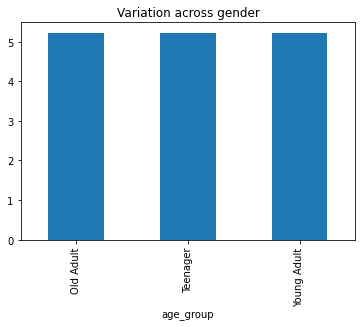

In [41]:

#Show values on each container
import matplotlib.pyplot as plt
ax=df_1.groupby(["age_group"])["price"].min().plot(kind='bar', title='Variation across gender')
for container in ax.containers:
 ax.bar_label(container, label_type='edge')
plt.tight_layout
plt.show()

In [ ]:
#UPGRADE MATPLOTLIB
!pip install --upgrade
matplotlib

In [ ]:
df_1.groupby(["age_group","invoice_date"]).min().plot(kind='bar', title='Variation across gender')

In [ ]:
df_1. groupby(["category", "gender"]).size()
#plot the graph using the new category
df_1. groupby(["category", "gender"]).size().sort_values(ascending= False).plot(kind='bar', title='Variation across gender')

In [42]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']